# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_made/homeworks/Lab1_ML_pipeline_and_SVM/car_data.csv

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


In [ ]:
y_train_pd = pd.DataFrame(y_train)
y_train_pd.describe()

,0
count,549
unique,4
top,opel
freq,152


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,822,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207
1,486,104,57,103,222,72,12,221,30,25,177,223,718,218,72,11,12,186,195
2,182,91,42,66,169,66,7,145,44,19,140,169,325,159,67,4,0,201,207
3,375,109,52,95,189,58,4,227,29,25,158,262,776,217,82,0,19,187,186
4,528,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
5,223,81,44,72,139,60,6,153,44,19,146,180,347,178,81,1,15,182,186
6,840,93,34,66,140,56,7,130,51,18,120,151,251,114,62,5,29,201,207
7,593,89,43,77,147,54,8,144,46,19,146,163,308,174,64,13,5,194,201
8,346,117,52,110,228,65,12,212,31,24,163,228,668,220,66,21,25,194,205
9,357,109,49,109,193,59,10,207,32,24,156,225,635,213,70,13,31,191,202


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,425.723133,93.520947,44.675774,81.801457,168.204007,61.644809,8.457195,167.327869,41.273224,20.468124,147.438980,186.734062,431.540984,173.763206,72.158470,6.522769,12.646630,188.998179,195.854281
std,242.288797,8.063277,6.154680,15.928751,33.047995,7.110666,3.945857,32.506680,7.777590,2.526030,14.631309,30.436279,171.479332,31.793047,7.335198,4.980796,8.833356,6.298389,7.449629
min,0.000000,76.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,217.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,148.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,430.000000,93.000000,44.000000,79.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,177.000000,363.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,636.000000,99.000000,49.000000,98.000000,195.000000,66.000000,10.000000,196.000000,46.000000,23.000000,159.000000,216.000000,576.000000,196.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,110.000000,306.000000,126.000000,52.000000,265.000000,59.000000,29.000000,186.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [ ]:
### YOUR CODE HERE

#Популярный способ масштабирования - нормализация: вычитание среднего из каждого признака и деление на 
#стандартное отклонение (StandardScaler в sklearn).
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Преобразование y_train и y_test
for i in range(len(y_train)):
    if y_train[i] == 'bus':
        y_train[i] = 0
    if y_train[i] == 'van':
        y_train[i] = 1
    if y_train[i] == 'saab':
        y_train[i] = 2
    if y_train[i] == 'opel':
        y_train[i] = 3
        
for i in range(len(y_test)):
    if y_test[i] == 'bus':
        y_test[i] = 0
    if y_test[i] == 'van':
        y_test[i] = 1
    if y_test[i] == 'saab':
        y_test[i] = 2
    if y_test[i] == 'opel':
        y_test[i] = 3  
y_train = y_train.astype('int')
y_test = y_test.astype('int')

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

parameters_lr= {
    'C': [50, 30, 10, 7, 5, 3, 1.0, 0.1, 0.01],
    'max_iter': [500],
    'tol': [1e-3],
    'multi_class': ['multinomial'],
    'solver': ['saga']
}

clf_lr = LogisticRegression()
lr_grid = GridSearchCV(clf_lr, parameters_lr, cv = 3, scoring = 'accuracy')
lr_grid.fit(X_train, y_train)
print('LogisticRegression - best estimator: ', lr_grid.best_estimator_)
print("Предсказание класса через лучшие параметры f1_score", 
      f1_score(y_test, lr_grid.best_estimator_.predict(X_test), average = 'macro'))
print("Предсказание класса через лучшие параметры accuracy", 
      accuracy_score(y_test, lr_grid.best_estimator_.predict(X_test)))

LogisticRegression - best estimator:  LogisticRegression(C=10, max_iter=500, multi_class='multinomial', solver='saga',
                   tol=0.001)
Предсказание класса через лучшие параметры f1_score 0.808073408073408
Предсказание класса через лучшие параметры accuracy 0.8148148148148148


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

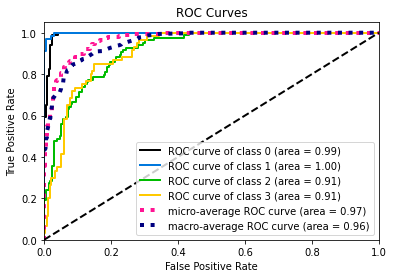

In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead
import scikitplot as skplt

y_probas = lr_grid.best_estimator_.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

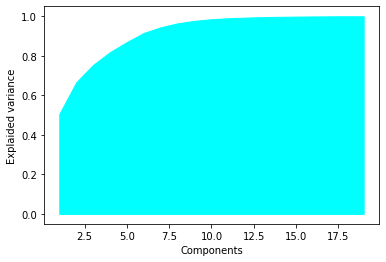

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_train)
answer = np.cumsum(pca.explained_variance_ratio_)

plt.fill_between(range(1, answer.shape[0] + 1), answer, np.zeros_like(answer), color='cyan')
plt.ylabel('Explaided variance')
plt.xlabel('Components')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
### YOUR CODE HERE
## Из рафика видно, что с количества компонент = 14 график выходит в плато
pca = PCA(n_components = 14)
pca.fit(X_train)

print(pca.explained_variance_ratio_)

[0.50579179 0.1601189  0.08799881 0.06461391 0.05124018 0.04602338
 0.02861935 0.01998363 0.01244617 0.00821984 0.00493024 0.0031257
 0.00219949 0.00181861]


In [ ]:
### YOUR CODE HERE
#Данные необходимо масштабировать перед применением метода PCA.
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
### YOUR CODE HERE
parameters_lr_pca = {
    'C': [50, 10, 5, 0.1, 0.01],
    'max_iter': [500],
    'tol': [1e-3],
    'multi_class': ['multinomial'],
    'solver': ['saga']
}

clf_lr_pca = LogisticRegression()
lr_grid_pca = GridSearchCV(clf_lr_pca, parameters_lr_pca, cv = 3, scoring = 'accuracy')
lr_grid_pca.fit(X_train_pca, y_train)

print('LogisticRegression - best estimator: ', lr_grid_pca.best_estimator_)
print("Предсказание класса через лучшие параметры f1_score", 
      f1_score(y_test, lr_grid_pca.best_estimator_.predict(X_test_pca), average = 'macro'))
print("Предсказание класса через лучшие параметры accuracy", 
      accuracy_score(y_test, lr_grid_pca.best_estimator_.predict(X_test_pca)))

LogisticRegression - best estimator:  LogisticRegression(C=10, max_iter=500, multi_class='multinomial', solver='saga',
                   tol=0.001)
Предсказание класса через лучшие параметры f1_score 0.7617634864891231
Предсказание класса через лучшие параметры accuracy 0.7676767676767676


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

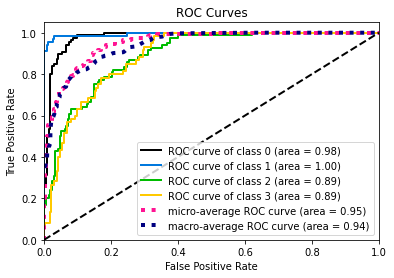

In [ ]:
y_probas_pca = lr_grid_pca.best_estimator_.predict_proba(X_test_pca)
skplt.metrics.plot_roc(y_test, y_probas_pca)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
parameters_dt_pca = {
    'random_state' : [42],
    'max_depth': [10, 50, 100, 200, 300, 400]
}

clf_dt_pca = DecisionTreeClassifier()
dt_grid_pca = GridSearchCV(clf_dt_pca, parameters_dt_pca, cv = 3, scoring = 'accuracy')
dt_grid_pca.fit(X_train_pca, y_train)

print('DecisionTreeClassifier - best estimator: ', dt_grid_pca.best_estimator_)
print("Предсказание класса через лучшие параметры f1_score", 
      f1_score(y_test, dt_grid_pca.best_estimator_.predict(X_test_pca), average = 'macro'))
print("Предсказание класса через лучшие параметры accuracy", 
      accuracy_score(y_test, dt_grid_pca.best_estimator_.predict(X_test_pca)))

DecisionTreeClassifier - best estimator:  DecisionTreeClassifier(max_depth=10, random_state=42)
Предсказание класса через лучшие параметры f1_score 0.6841114901184131
Предсказание класса через лучшие параметры accuracy 0.6868686868686869


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

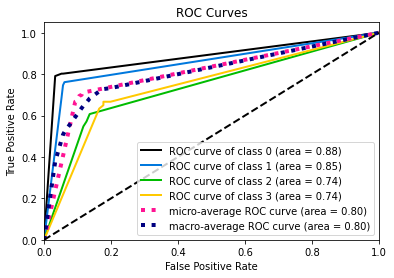

In [ ]:
y_probas_pca_dt = dt_grid_pca.best_estimator_.predict_proba(X_test_pca)
skplt.metrics.plot_roc(y_test, y_probas_pca_dt)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE 

In [ ]:
from sklearn.ensemble import BaggingClassifier

results = pd.DataFrame([],columns=list(['C','n_est', 'accuracy', 'f1_score']))
for j in [50, 10, 5, 0.1, 0.01]:
    clf_stump = LogisticRegression(C=j, max_iter=500, multi_class='multinomial', solver='saga',tol=0.001)
    for i in np.arange(2, 107, 5):
        baglfy = BaggingClassifier(base_estimator = clf_stump, n_estimators = i, max_samples = 1.0)
        baglfy = baglfy.fit(X_train, y_train)
        run_rslt = pd.DataFrame([[j, i, accuracy_score(y_test, baglfy.predict(X_test)),\
                   f1_score(y_test, baglfy.predict(X_test), average = 'macro')]],
            columns = list(['C','n_est','accuracy', 'f1_score']))
        results = results.append(run_rslt)

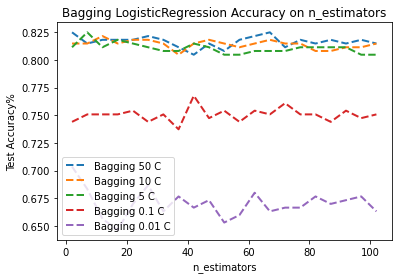

    C n_est  accuracy  f1_score
0  50     2  0.824916  0.818638
0  50    67  0.824916  0.818632
0   5     7  0.824916  0.818457
None


In [ ]:
for j in [50, 10, 5, 0.1, 0.01]:
    plt.plot(results.loc[(results.C==j), ['n_est']], 
             results.loc[(results.C==j), ['accuracy']], 
             label = 'Bagging ' + str(j) + ' C',linestyle='--',linewidth=2, )

plt.title('Bagging LogisticRegression Accuracy on n_estimators')
plt.legend(loc='best')
plt.ylabel('Test Accuracy%')
plt.xlabel('n_estimators')
plt.show()
print(print(results[results.accuracy == results.accuracy.max()]) )

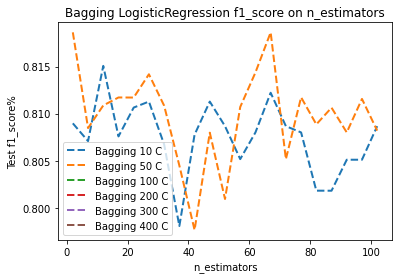

    C n_est  accuracy  f1_score
0  50     2  0.824916  0.818638
None


In [ ]:
for j in [10, 50, 100, 200, 300, 400]:
    plt.plot(results.loc[(results.C==j), ['n_est']], 
             results.loc[(results.C==j), ['f1_score']], 
             label = 'Bagging ' + str(j) + ' C',linestyle='--',linewidth=2, )

plt.title('Bagging LogisticRegression f1_score on n_estimators')
plt.legend(loc = 'best')
plt.ylabel('Test f1_score%')
plt.xlabel('n_estimators')
plt.show()
print(print(results[results.f1_score == results.f1_score.max()]) )

Оптимальные параметры для Bagging LogisticRegression С = 50, n_estimators = 2

In [ ]:
results = pd.DataFrame([],columns=list(['max_depth','n_est', 'accuracy', 'f1_score']))
for j in [10, 50, 100, 200, 300, 400]:
    clf_stump = DecisionTreeClassifier(max_depth = j, random_state = 42)
    for i in np.arange(2, 107, 5):
        baglfy = BaggingClassifier(base_estimator = clf_stump, n_estimators = i, max_samples = 1.0)
        baglfy = baglfy.fit(X_train, y_train)
        run_rslt = pd.DataFrame([[j, i, accuracy_score(y_test, baglfy.predict(X_test)),\
                   f1_score(y_test, baglfy.predict(X_test), average = 'macro')]],
            columns = list(['max_depth','n_est','accuracy', 'f1_score']))
        results = results.append(run_rslt)

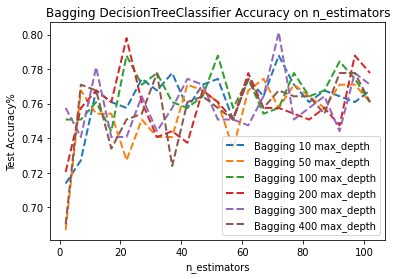

  max_depth n_est  accuracy  f1_score
0       300    72  0.801347  0.790596
None


In [ ]:
for j in [10, 50, 100, 200, 300, 400]:
    plt.plot(results.loc[(results.max_depth==j), ['n_est']], 
             results.loc[(results.max_depth==j), ['accuracy']], 
             label = 'Bagging ' + str(j) + ' max_depth',linestyle='--',linewidth=2, )

plt.title('Bagging DecisionTreeClassifier Accuracy on n_estimators')
plt.legend(loc='best')
plt.ylabel('Test Accuracy%')
plt.xlabel('n_estimators')
plt.show()
print(print(results[results.accuracy == results.accuracy.max()]) )

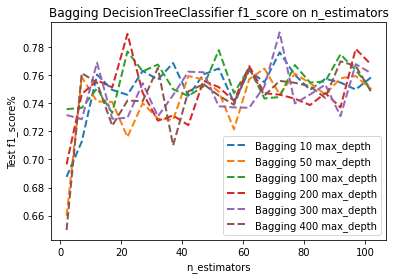

  max_depth n_est  accuracy  f1_score
0       300    72  0.801347  0.790596
None


In [ ]:
for j in [10, 50, 100, 200, 300, 400]:
    plt.plot(results.loc[(results.max_depth==j), ['n_est']], 
             results.loc[(results.max_depth==j), ['f1_score']], 
             label = 'Bagging ' + str(j) + ' max_depth',linestyle='--',linewidth=2, )

plt.title('Bagging DecisionTreeClassifier f1_score on n_estimators')
plt.legend(loc = 'best')
plt.ylabel('Test f1_score%')
plt.xlabel('n_estimators')
plt.show()
print(print(results[results.f1_score == results.f1_score.max()]) )

Оптимальные параметры для Bagging DecisionTreeClassifier max_depth = 300, n_est = 72

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

results = pd.DataFrame([],columns=list(['max_depth', 'accuracy', 'f1_score']))
for j in [10, 50, 100, 200, 300, 400]:
    for i in np.arange(2, 107, 5):
        rf_classifier = RandomForestClassifier(max_depth = j, random_state = 42, n_estimators = i)    
        rf_classifier = rf_classifier.fit(X_train, y_train)
        run_rslt = pd.DataFrame([[j, i, accuracy_score(y_test, rf_classifier.predict(X_test)),\
                   f1_score(y_test, rf_classifier.predict(X_test), average = 'macro')]],
            columns = list(['max_depth','n_est','accuracy', 'f1_score']))
        results = results.append(run_rslt)

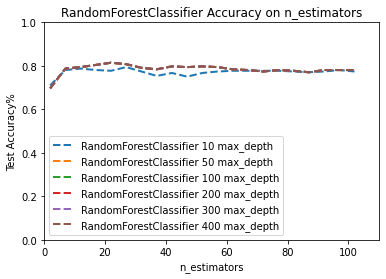

  max_depth  accuracy  f1_score  n_est
0        50  0.814815  0.806013   22.0
0       100  0.814815  0.806013   22.0
0       200  0.814815  0.806013   22.0
0       300  0.814815  0.806013   22.0
0       400  0.814815  0.806013   22.0
None


In [ ]:
plt.axis([0, 110, 0, 1])
for j in [10, 50, 100, 200, 300, 400]:
    plt.plot(results.loc[(results.max_depth==j), ['n_est']], 
             results.loc[(results.max_depth==j), ['accuracy']], 
             label = 'RandomForestClassifier ' + str(j) + ' max_depth',linestyle='--',linewidth=2, )

plt.title('RandomForestClassifier Accuracy on n_estimators')
plt.legend(loc='best')
plt.ylabel('Test Accuracy%')
plt.xlabel('n_estimators')
plt.show()
print(print(results[results.accuracy == results.accuracy.max()]) )

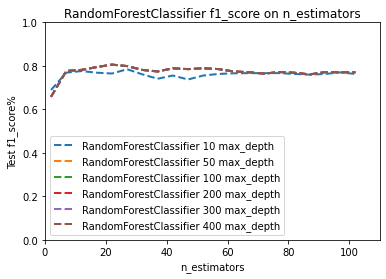

  max_depth  accuracy  f1_score  n_est
0        50  0.814815  0.806013   22.0
0       100  0.814815  0.806013   22.0
0       200  0.814815  0.806013   22.0
0       300  0.814815  0.806013   22.0
0       400  0.814815  0.806013   22.0
None


In [ ]:
plt.axis([0, 110, 0, 1])
for j in [10, 50, 100, 200, 300, 400]:
    plt.plot(results.loc[(results.max_depth==j), ['n_est']], 
             results.loc[(results.max_depth==j), ['f1_score']], 
             label = 'RandomForestClassifier ' + str(j) + ' max_depth',linestyle='--',linewidth=2, )

plt.title('RandomForestClassifier f1_score on n_estimators')
plt.legend(loc = 'best')
plt.ylabel('Test f1_score%')
plt.xlabel('n_estimators')
plt.show()
print(print(results[results.f1_score == results.f1_score.max()]) )

Оптимальные параметры для RandomForestClassifier max_depth = 50, n_estimators = 22

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
results_rf = pd.DataFrame([],columns=list(['amount_train', 'accuracy', 'f1_score']))
results_dt = pd.DataFrame([],columns=list(['amount_train', 'accuracy', 'f1_score']))
results_lr = pd.DataFrame([],columns=list(['amount_train', 'accuracy', 'f1_score']))

In [ ]:
# YOUR CODE HERE
rf_classifier = RandomForestClassifier(max_depth = 50, random_state = 42, n_estimators = 22) 
dt_classifier = DecisionTreeClassifier(max_depth=50, random_state=42)
lr_classifier = LogisticRegression(C=50, max_iter=500, multi_class='multinomial', solver='saga', tol=0.001)
for j in range(1, 11, 1):
    rf_classifier = rf_classifier.fit(X_train[:55 * j], y_train[:55 * j])
    run_rf = pd.DataFrame([[55 * j, accuracy_score(y_test, rf_classifier.predict(X_test)),\
               f1_score(y_test, rf_classifier.predict(X_test), average = 'micro')]],
        columns = list(['amount_train','accuracy', 'f1_score']))
    results_rf = results_rf.append(run_rf)
    
    dt_classifier = dt_classifier.fit(X_train[:55 * j], y_train[:55 * j])
    run_dt= pd.DataFrame([[55 * j, accuracy_score(y_test, dt_classifier.predict(X_test)),\
               f1_score(y_test, dt_classifier.predict(X_test), average = 'micro')]],
        columns = list(['amount_train','accuracy', 'f1_score']))
    results_dt = results_dt.append(run_dt)
    
    lr_classifier = lr_classifier.fit(X_train[:55 * j], y_train[:55 * j])
    run_lr = pd.DataFrame([[55 * j, accuracy_score(y_test, lr_classifier.predict(X_test)),\
               f1_score(y_test, lr_classifier.predict(X_test), average = 'micro')]],
        columns = list(['amount_train','accuracy', 'f1_score']))
    results_lr = results_lr.append(run_lr)

/home/anastasia/venv3/venv3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



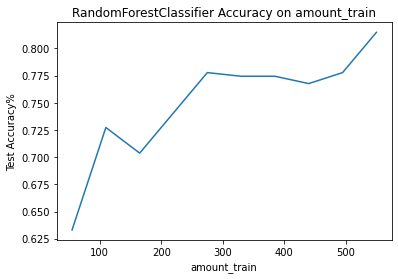

  amount_train  accuracy  f1_score
0          550  0.814815  0.814815
None


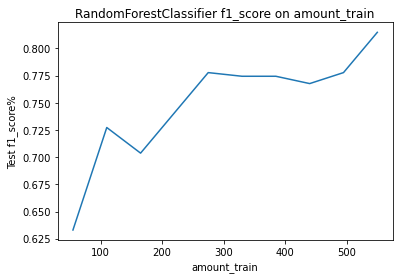

  amount_train  accuracy  f1_score
0          550  0.814815  0.814815
None


In [ ]:
plt.plot(results_rf['amount_train'], results_rf['accuracy'])
plt.title('RandomForestClassifier Accuracy on amount_train')
plt.ylabel('Test Accuracy%')
plt.xlabel('amount_train')
plt.show()
print(print(results_rf[results_rf.accuracy == results_rf.accuracy.max()]))


plt.plot(results_rf['amount_train'], results_rf['f1_score'])
plt.title('RandomForestClassifier f1_score on amount_train')
plt.ylabel('Test f1_score%')
plt.xlabel('amount_train')
plt.show()
print(print(results_rf[results_rf.f1_score == results_rf.f1_score.max()]))

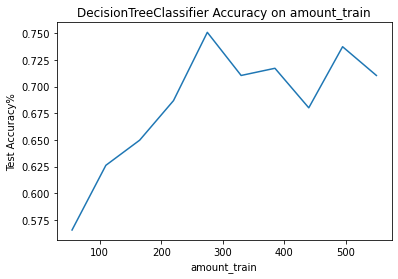

  amount_train  accuracy  f1_score
0          275  0.750842  0.750842
None


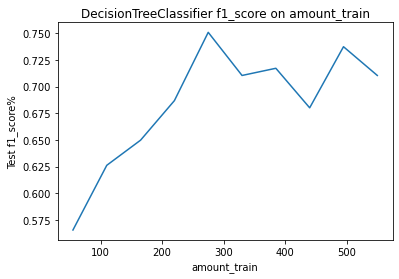

  amount_train  accuracy  f1_score
0          275  0.750842  0.750842
None


In [ ]:
plt.plot(results_dt['amount_train'], results_dt['accuracy'])
plt.title('DecisionTreeClassifier Accuracy on amount_train')
plt.ylabel('Test Accuracy%')
plt.xlabel('amount_train')
plt.show()
print(print(results_dt[results_dt.accuracy == results_dt.accuracy.max()]))


plt.plot(results_dt['amount_train'], results_dt['f1_score'])
plt.title('DecisionTreeClassifier f1_score on amount_train')
plt.ylabel('Test f1_score%')
plt.xlabel('amount_train')
plt.show()
print(print(results_dt[results_dt.f1_score == results_dt.f1_score.max()]))

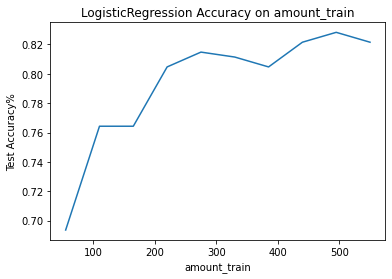

  amount_train  accuracy  f1_score
0          495  0.828283  0.828283
None


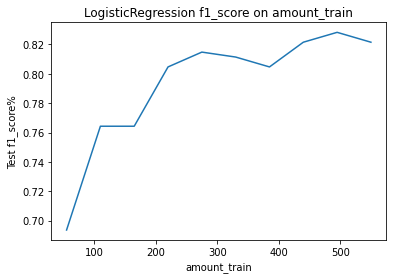

  amount_train  accuracy  f1_score
0          495  0.828283  0.828283
None


In [ ]:
plt.plot(results_lr['amount_train'], results_lr['accuracy'])
plt.title('LogisticRegression Accuracy on amount_train')
plt.ylabel('Test Accuracy%')
plt.xlabel('amount_train')
plt.show()
print(print(results_lr[results_lr.accuracy == results_lr.accuracy.max()]))


plt.plot(results_lr['amount_train'], results_lr['f1_score'])
plt.title('LogisticRegression f1_score on amount_train')
plt.ylabel('Test f1_score%')
plt.xlabel('amount_train')
plt.show()
print(print(results_lr[results_lr.f1_score == results_lr.f1_score.max()]))

Для RandomForestClassifier весь набор данных является лучшим вариантом. Для DecisionTreeClassifier 275 из 549 (вероятно, что это из-за переобучения дерева решения). Для LogisticRegression 495 из 549.